<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/Fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
#import our helper functions 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


--2022-07-11 08:34:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-11 08:34:49 (57.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



#download Data from kaggle and unzip it 

In [2]:
!pip install -q kaggle

In [3]:
!wget https://raw.githubusercontent.com/zlximon/Tensorflow_DL/master/kaggle.json

--2022-07-11 08:34:59--  https://raw.githubusercontent.com/zlximon/Tensorflow_DL/master/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2022-07-11 08:34:59 (2.99 MB/s) - ‘kaggle.json’ saved [63/63]



In [4]:
from google.colab import  files
#files.upload()

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d moltean/fruits

 99% 1.28G/1.28G [00:09<00:00, 173MB/s]
100% 1.28G/1.28G [00:09<00:00, 148MB/s]


In [9]:
#unzip data
unzip_data("fruits.zip")

In [10]:
walk_through_dir("ffruits-fruits-360_dataset/fruits-360")

In [11]:
#set test and train directories
train_dir=("/content/fruits-360_dataset/fruits-360/Training")
test_dir=("/content/fruits-360_dataset/fruits-360/Test")

In [12]:
from sklearn.datasets import load_files
import numpy as np
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [13]:
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

In [14]:
import tensorflow as tf
IMAGE_SIZE=(224,224)

train_data=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMAGE_SIZE, label_mode="categorical",batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMAGE_SIZE,label_mode="categorical",batch_size=32)

Found 67692 files belonging to 131 classes.
Found 22688 files belonging to 131 classes.


In [15]:
#our dataset class names 
class_names=train_data.class_names
total_classes=len(train_data.class_names)
total_classes,train_data.class_names

(131,
 ['Apple Braeburn',
  'Apple Crimson Snow',
  'Apple Golden 1',
  'Apple Golden 2',
  'Apple Golden 3',
  'Apple Granny Smith',
  'Apple Pink Lady',
  'Apple Red 1',
  'Apple Red 2',
  'Apple Red 3',
  'Apple Red Delicious',
  'Apple Red Yellow 1',
  'Apple Red Yellow 2',
  'Apricot',
  'Avocado',
  'Avocado ripe',
  'Banana',
  'Banana Lady Finger',
  'Banana Red',
  'Beetroot',
  'Blueberry',
  'Cactus fruit',
  'Cantaloupe 1',
  'Cantaloupe 2',
  'Carambula',
  'Cauliflower',
  'Cherry 1',
  'Cherry 2',
  'Cherry Rainier',
  'Cherry Wax Black',
  'Cherry Wax Red',
  'Cherry Wax Yellow',
  'Chestnut',
  'Clementine',
  'Cocos',
  'Corn',
  'Corn Husk',
  'Cucumber Ripe',
  'Cucumber Ripe 2',
  'Dates',
  'Eggplant',
  'Fig',
  'Ginger Root',
  'Granadilla',
  'Grape Blue',
  'Grape Pink',
  'Grape White',
  'Grape White 2',
  'Grape White 3',
  'Grape White 4',
  'Grapefruit Pink',
  'Grapefruit White',
  'Guava',
  'Hazelnut',
  'Huckleberry',
  'Kaki',
  'Kiwi',
  'Kohlrabi',

In [ ]:
#create model with Functional API
from tensorflow.keras import layers
inputs=layers.Input(shape=(224,224,3),name="model1")
x=layers.Conv2D(10,3,activation="relu" )(inputs)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(10,3,activation="relu")(x)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(10,3,activation="relu")(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=layers.Dense(total_classes,activation="softmax")(x)
model1=tf.keras.Model(inputs,outputs)

In [ ]:
#check our model summar()
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model1 (InputLayer)         [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910   

In [ ]:
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
#fit our model
model1_history=model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=(0.25*len(test_data)))

Epoch 1/5
2116/2116 [==============================] - 98s 40ms/step - loss: 0.0703 - accuracy: 0.0677 - val_loss: 0.0336 - val_accuracy: 0.1562
Epoch 2/5
2116/2116 [==============================] - 84s 40ms/step - loss: 0.0278 - accuracy: 0.3600 - val_loss: 0.0234 - val_accuracy: 0.5492
Epoch 3/5
2116/2116 [==============================] - 82s 39ms/step - loss: 0.0196 - accuracy: 0.6520 - val_loss: 0.0169 - val_accuracy: 0.7101
Epoch 4/5
2116/2116 [==============================] - 83s 39ms/step - loss: 0.0134 - accuracy: 0.8187 - val_loss: 0.0121 - val_accuracy: 0.8636
Epoch 5/5
2116/2116 [==============================] - 83s 39ms/step - loss: 0.0101 - accuracy: 0.8894 - val_loss: 0.0117 - val_accuracy: 0.8664


In [ ]:
model1.evaluate(test_data)

709/709 [==============================] - 22s 31ms/step - loss: 0.0116 - accuracy: 0.8703


[0.01158109400421381, 0.8703279495239258]

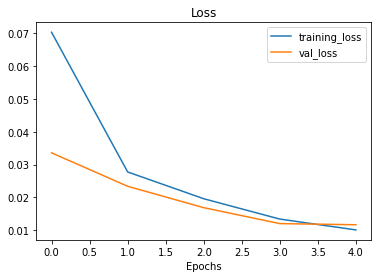

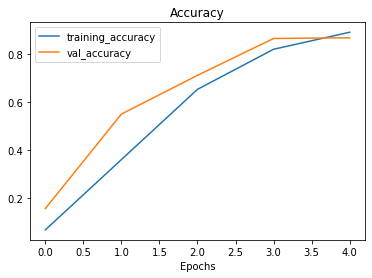

In [ ]:
plot_loss_curves(model1_history)

In [25]:
def load_and_prep_image(filename, img_shape=224, scale=True):
 
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale? Yes/no
  if scale:
    # rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img # don't need to rescale images for EfficientNet models in TensorFlow

In [35]:
import matplotlib.pyplot as plt

IMG_NAME="/content/ava2.jpg"

In [36]:
IMG_NAME = load_and_prep_image(IMG_NAME, scale=False) # don't need to scale for our EfficientNetB0 model
pred_prob = model1.predict(tf.expand_dims(IMG_NAME, axis=0)) # make prediction on image with shape [1, 224, 224, 3] (same shape as model was trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with the highet prediction probability
# Plot the appropriate information
plt.figure()
plt.imshow(IMG_NAME/225.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)

NameError: ignored

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
y_probs=model1.predict(test_data)
y_preds=y_probs.argmax(axis=1)


In [ ]:
y_preds[:10]

array([114, 101,  95, 121,  25, 103,  33,   6,  59, 101])

In [ ]:
make_confusion_matrix(y_true=y_test,y_pred=y_preds,figsize=(200,200),text_size=30)

In [ ]:
class_names[5]

#model2 

In [42]:
#create a model 2 with functinal API
from tensorflow.keras import layers
inputs=layers.Input(shape=(224,224,3),name="model2",dtype='float32')
x=layers.Conv2D(16,2,activation="relu")(inputs)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(32,2,activation="relu")(x)
x=layers.MaxPool2D()(x)
x=layers.Conv2D(64,2,activation="relu")(x)
x=layers.MaxPool2D()(x)
x=layers.GlobalAveragePooling2D()(x)
#x=layers.Flatten()(x)

outputs=layers.Dense(total_classes,activation="softmax")(x)
model2=tf.keras.Model(inputs,outputs)

In [43]:
model2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [44]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model2 (InputLayer)         [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 223, 223, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 110, 110, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 54, 54, 64)        8256

AttributeError: ignored

In [45]:
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=(0.25*len(test_data)))

Epoch 1/5
2116/2116 [==============================] - 92s 43ms/step - loss: 0.0511 - accuracy: 0.6040 - val_loss: 0.0108 - val_accuracy: 0.8622
Epoch 2/5
2116/2116 [==============================] - 92s 44ms/step - loss: 0.0061 - accuracy: 0.9450 - val_loss: 0.0068 - val_accuracy: 0.9408
Epoch 3/5
2116/2116 [==============================] - 93s 44ms/step - loss: 0.0036 - accuracy: 0.9736 - val_loss: 0.0077 - val_accuracy: 0.9308
Epoch 4/5
2116/2116 [==============================] - 92s 43ms/step - loss: 0.0025 - accuracy: 0.9854 - val_loss: 0.0039 - val_accuracy: 0.9700
Epoch 5/5
2116/2116 [==============================] - 92s 43ms/step - loss: 0.0017 - accuracy: 0.9910 - val_loss: 0.0027 - val_accuracy: 0.9837


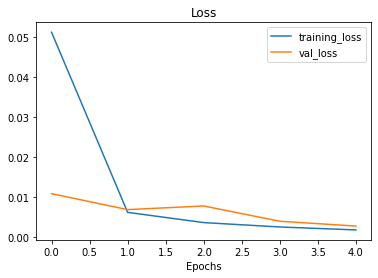

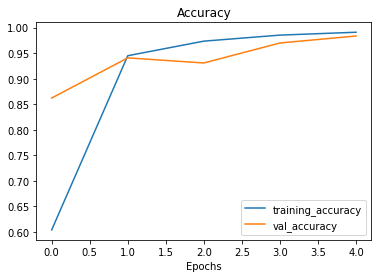

In [46]:
plot_loss_curves(history2)

In [40]:
model2.evaluate(test_data)

709/709 [==============================] - 27s 37ms/step - loss: 0.0030 - accuracy: 0.9799


[0.0030433994252234697, 0.9799453616142273]

In [56]:
import matplotlib.pyplot as plt

IMG_NAME="/content/carrot.jpg"

In [58]:
IMG_NAME = load_and_prep_image(IMG_NAME, scale=False) 
pred_prob = model2.predict(tf.expand_dims(IMG_NAME, axis=0)) # make prediction on image with shape [1, 224, 224, 3] (same shape as model was trained on)
pred_class = class_names[pred_prob.argmax()] # get the index with the highet prediction probability
# Plot the appropriate information
plt.figure()
plt.imshow(IMG_NAME/225.)
plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
plt.axis(False)

InvalidArgumentError: ignored